In [2]:
from sympy import symbols, solve, cos, sin, tan, cot, atan, acos, lambdify, pi

In [3]:
### Def angles alpha and beta
tb = symbols(r't_{\beta}',real=True)
cab = symbols(r'c_{\alpha\beta}',real=True)

beta = atan(tb)
alpha = atan(tb) - acos(cab) 
# cab = 0.01 # Alignment h SM-like.

bad = beta - alpha
bau = alpha + beta
a3b = alpha - 3*beta

sa = sin(alpha)
ca = cos(alpha)
sb = sin(beta)
cb = cos(beta)
#tanb = tan(beta)
#cotb = cot(beta)

In [4]:
xi_lphi = (ca/sb)
xi_lphi

sqrt(t_{\beta}**2 + 1)*cos(acos(c_{\alpha\beta}) - atan(t_{\beta}))/t_{\beta}

In [5]:
cab_val = 0.01
xi_lphi_tb = xi_lphi.subs(cab, cab_val).simplify()
xi_lphi_tb

0.999949998749938 + 0.01/t_{\beta}

In [6]:
kappaTau1=1.01
kappaTauSUP1sig=1.02+0.17
kappaTauINF1sig=1.02-0.17
kappaTauSUP2sig=1.36
kappaTauINF2sig=0.68

In [7]:

cota_inf_1sig = solve(xi_lphi_tb -kappaTauINF1sig,tb)[0]
cota_sup_1sig = solve(xi_lphi_tb -kappaTauSUP1sig,tb)[0]

cota_inf_1sig, cota_sup_1sig


(-0.0666888968547199, 0.0526177318296478)

In [8]:
cota_inf_2sig = solve(xi_lphi_tb -kappaTauINF2sig,tb)[0]
cota_sup_2sig = solve(xi_lphi_tb -kappaTauSUP2sig,tb)[0]

cota_inf_2sig, cota_sup_2sig

(-0.0312548836976733, 0.0277739201924201)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

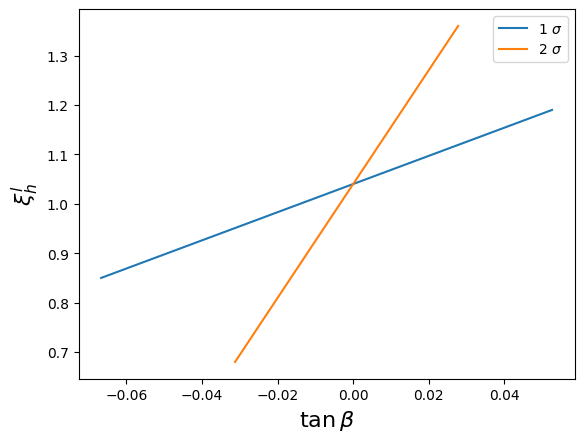

In [10]:
cotas_1s = np.array([cota_inf_1sig, cota_sup_1sig])
cotas_2s = np.array([cota_inf_2sig, cota_sup_2sig])
xi_lphif = lambdify(tb, xi_lphi_tb, 'numpy')

plt.plot(cotas_1s, xi_lphif(cotas_1s), label=r'1 $\sigma$')
plt.plot(cotas_2s, xi_lphif(cotas_2s), label=r'2 $\sigma$')
plt.xlabel(r'$\tan{\beta}$', fontsize=16)
plt.ylabel(r'$\xi^l_{h}$', fontsize=16)
#plt.savefig('cota_tb_typeI.png')
plt.legend()

c:\Users\moise\miniconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


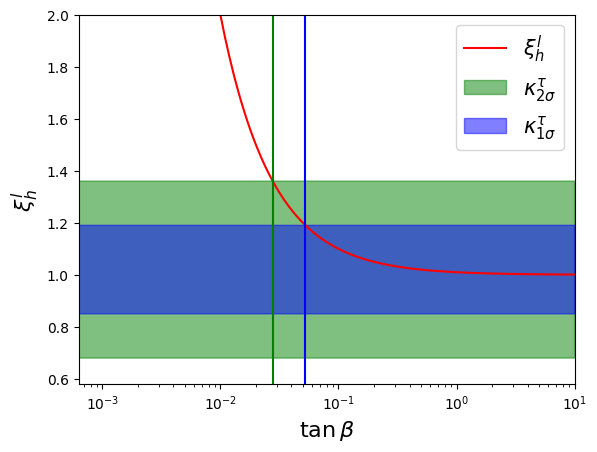

In [12]:
tbi, tbf = 0,10
tanb = np.linspace(tbi,tbf,10000)
plt.semilogx(tanb, xi_lphif(tanb), 'r', label=r'$\xi^l_{h}$')

# 2 sigma lines
plt.fill_between(
    x=tanb ,y1=kappaTauINF2sig, y2=kappaTauSUP2sig,
    alpha=0.5, color='g',
    label=r'$\kappa^\tau_{2 \sigma}$')
plt.vlines(x=cota_sup_2sig, ymin=0.1, ymax=2, colors='g')

# 1 sigma lines
plt.fill_between(
    x=tanb ,y1=kappaTauINF1sig, y2=kappaTauSUP1sig,
    alpha=0.5, color='b',
    label=r'$\kappa^\tau_{1 \sigma}$')
plt.vlines(x=cota_sup_1sig, ymin=0.1, ymax=2, colors='b')

plt.xlabel(r'$\tan{\beta}$', fontsize=16)
plt.ylabel(r'$\xi^l_{h}$', fontsize=16)
plt.xlim(0,10)
plt.ylim(kappaTauINF2sig-0.1,2)
plt.savefig('cota_tb_typeI.png')
plt.legend(fontsize=15)